# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create two new dataframes
north_df=pd.read_csv('~/Dropbox/LC_DA/Git/call-center-cleanup-assignment/NorthCallCenter.csv')
south_df=pd.read_csv('~/Dropbox/LC_DA/Git/call-center-cleanup-assignment/SouthCallCenter.csv')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  
Answer: 9

In [2]:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [3]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [4]:
north_df['Rep ID'].describe()

count       245
unique        9
top       Brent
freq         37
Name: Rep ID, dtype: object

#### EDA Question 1B:  How many reps are in the South branch?  
Answer: 11

In [5]:
south_df['Rep ID'].describe()

count      314
unique      11
top       Eric
freq        35
Name: Rep ID, dtype: object

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 
Answer:
<br>Busy Minutes M= 9.99 min
<br>Not Ready Minutes M= 1.91 min
<br>Incoming Wait Time M= 3.05 min
<br>During Call Wait Time M= 2.97 min

In [6]:
north_df['Busy Minutes'].mean()

9.987755102040817

In [7]:
north_df['Not Ready Minutes'].mean()

1.9142857142857144

In [8]:
north_df['Incoming Wait Time'].mean()

3.048780487804878

In [9]:
north_df['During Call Wait Time'].mean()

2.9673469387755103

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 
Answer:
<br>Busy Minutes M= 10.05 min
<br>Not Ready Minutes M= 1.91 min
<br>Incoming Wait Time M= 3.00 min
<br>During Call Wait Time M= 3.08 min

In [10]:
south_df['Busy Minutes'].mean()

10.054140127388536

In [11]:
south_df['Not Ready Minutes'].mean()

1.910828025477707

In [12]:
south_df['Incoming Wait Time'].mean()

3.0

In [13]:
south_df['During Call Wait Time'].mean()

3.0764331210191083

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?
Answer:
<BR>10:00 AM = 99
<BR>11:00 AM = 56
<BR>12:00 PM = 120
<BR>1:00 PM  = 40
<BR>2:00 PM  = 65
<BR>3:00 PM  = 73
<BR>4:00 PM  = 53
<BR>5:00 PM  = 43
<BR>9:00 AM   = 10

In [14]:
north_df['Time Block'].value_counts()

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [15]:
#Group the data by time block and then count total calls made in that time block for North Branch
north_df_bytime = north_df.groupby('Time Block')
north_time_count = north_df_bytime['Calls'].count()
north_time_count

Time Block
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17
9:00 AM      5
Name: Calls, dtype: int64

In [16]:
#Group the data by time block and then count total calls made in that time block for South Branch
south_df_bytime = south_df.groupby('Time Block')
south_time_count = south_df_bytime['Calls'].count()
south_time_count

Time Block
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26
9:00 AM      5
Name: Calls, dtype: int64

In [17]:
#Sum total calls made by time block for the whole company
total_time_count = north_time_count + south_time_count
total_time_count

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99 min
> - Not Ready Minutes = 1.91 min
> - Incoming Wait Time = 3.05 min
> - During Call Wait Time = 2.97 min
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05 min
> - Not Ready Minutes = 1.91 min
> - Incoming Wait Time = 3.00 min
> - During Call Wait Time = 3.08 min
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   =  99
> - 10:00AM  =  56
> - 11:00AM  =  120
> - 12:00PM  =  40
> - 1:00PM   =  65
> - 2:00PM   =  73
> - 3:00PM   =  53
> - 4:00PM   =  43
> - 5:00PM   =  10


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 
<br> Yes, there is missing data in the 'incoming call wait time' coloumn in both data sets (seen in heat map). When the percentage missing is calculated, the missing data in 'incoming call wait time' is over 50%. We need this data for analysis below, so I will keep it. We do know if 'incoming call wait time' is missing at random or if missing data represent a zero, so will keep the missing data missing. 

In [18]:
north_df.shape

(245, 15)

In [19]:
south_df.shape

(314, 15)

<Axes: >

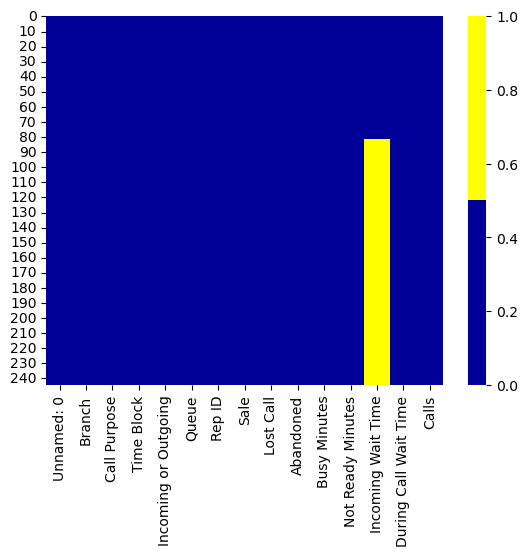

In [20]:
# Heat map in the North Branch to detect missing data
cols = north_df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(north_df[cols].isnull(), cmap=sns.color_palette(colours))

<Axes: >

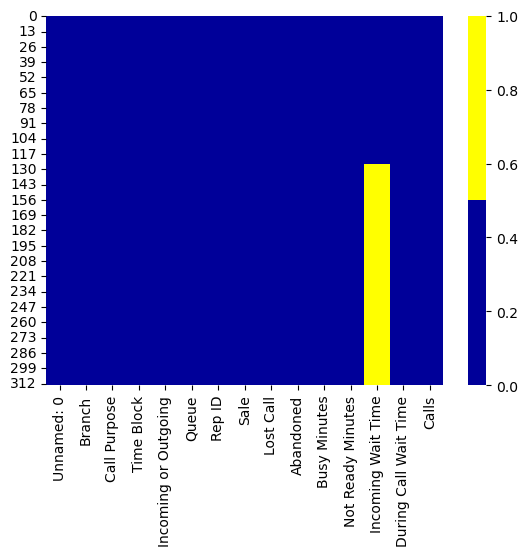

In [21]:
# Heat map in the South Branch to detect missing data
cols = south_df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(south_df[cols].isnull(), cmap=sns.color_palette(colours))

In [22]:
# Checking the percent missing data in the North Branch
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


In [23]:
# Checking the descriptive statistics on the varaible 'Incoming Wait Time' with missing data in the North Branch - looking for outliers
north_df['Incoming Wait Time'].describe()

count    82.000000
mean      3.048780
std       1.456382
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Incoming Wait Time, dtype: float64

<Axes: >

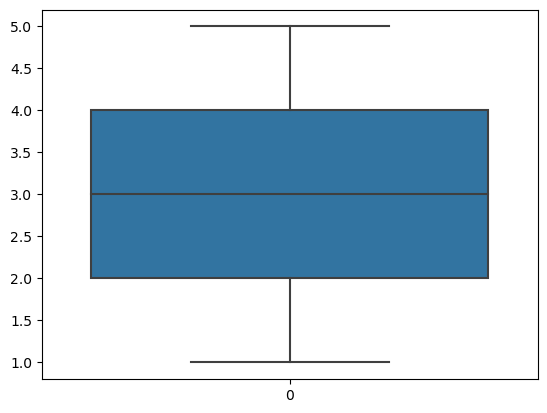

In [24]:
# Checking the distribtion on the varaible 'Incoming Wait Time' with missing data in the North Branch - looking for skew and non-randomness
sns.boxplot(data=north_df['Incoming Wait Time'])

In [25]:
# Checking the percent missing data in the South Branch
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [26]:
# Checking the desccriptive statistics of the varaible 'Incoming Wait Time' with missing data in the South Branch - looking for outliers
south_df['Incoming Wait Time'].describe()

count    126.000000
mean       3.000000
std        1.308434
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

<Axes: >

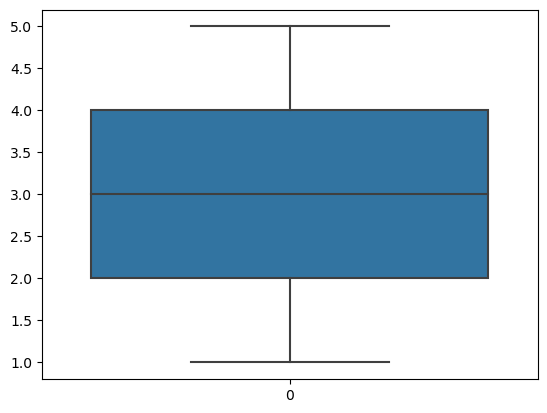

In [27]:
# Checking the distribtion of the varaible 'Incoming Wait Time' with missing data in the South Branch - looking for skew and non-randomness
sns.boxplot(data=south_df['Incoming Wait Time'])

In [28]:
#I can use this if I decide that missing data represents zero - FILLNA with ZERO
# north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(0)
# north_df.shape

In [29]:
# for col in north_df.columns:
#     pct_missing = np.mean(north_df[col].isnull())
#     print('{} - {}%'.format(col, round(pct_missing*100)))

In [30]:
#I can use this if I decide that missing data represents zero - FILLNA with ZERO
# south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(0)
# south_df.shape

In [31]:
# for col in south_df.columns:
#     pct_missing = np.mean(south_df[col].isnull())
#     print('{} - {}%'.format(col, round(pct_missing*100)))

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 
<br>I used a bargraph to see the different responses because there were so many 'NO' responses that .head was only showing me 'NO.' By using a bar graph, I could see that a very small amount of resposnes were 'YES' with an extra space. I use string stip to stip the white space and re-ran my bar graph to confirm that there are now only two responses. 

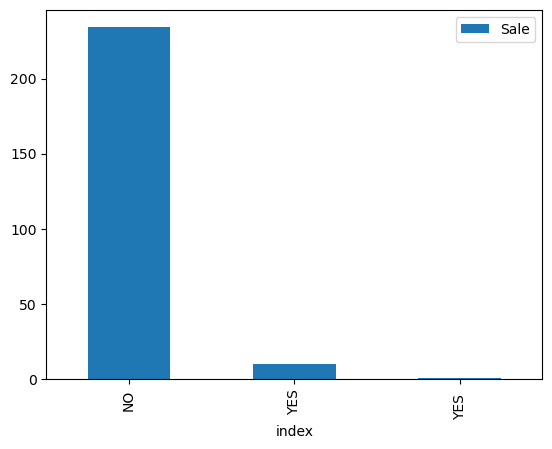

In [32]:
#Bar graph of 'Sale' distribution
north_df['Sale'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='Sale')
# Stripping white space from values of 'Sale'
north_df['Sale'] = north_df['Sale'].str.strip()

<Axes: xlabel='index'>

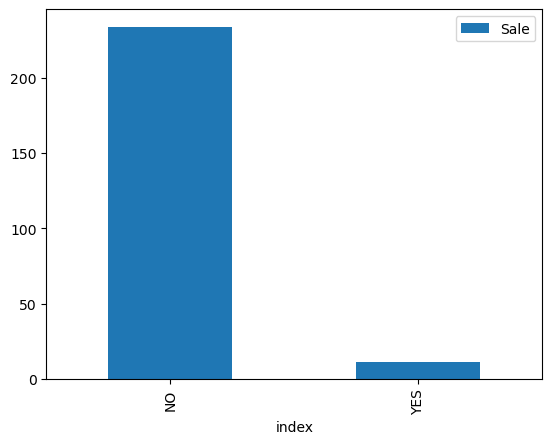

In [33]:
#Check bar graph of 'Sale' again to make sure only two values are present - yes and no.
north_df['Sale'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='Sale')

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: 
<br> Both sets had duplicate rows. I found them by droping the id column ('Unnamed: 0') and then droping duplicates and assigning that to an alias variable north/south_df_dedupes. When duplicate rows and columnes were detected, I droped duplicates permentantly from my cleaned versions of the dataframes. I then check the shape of the cleaned dataframes. 

In [34]:
#What is my id variable name that I will drop to check duplicates? 'Unnamed: 0'
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [35]:
#Checking for duplicates in the north branch - there are 2
north_df_dedupped = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()

print(north_df.shape)
print(north_df_dedupped.shape)

(245, 15)
(243, 14)


In [36]:
#Finding the duplicate rows: 50 and 105
north_df_noid = north_df.drop('Unnamed: 0', axis=1)
north_df_dupes = north_df_noid[north_df_noid.duplicated()]
north_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [37]:
#Dropping duplicate row 50 and checking work
north_df= north_df.drop(index=50)
north_df_noid = north_df.drop('Unnamed: 0', axis=1)
north_df_dupes = north_df_noid[north_df_noid.duplicated()]
north_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,2,1


In [38]:
#Dropping duplicate row 105 and checking work - all duplicates are gone
north_df = north_df.drop(index=105)
north_df_noid = north_df.drop('Unnamed: 0', axis=1)
north_df_dupes = north_df_noid[north_df_noid.duplicated()]
north_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [39]:
#Checking for duplicates in the north branch - there are 3
south_df_dedupped = south_df.drop('Unnamed: 0', axis=1).drop_duplicates()

print(south_df.shape)
print(south_df_dedupped.shape)

(314, 15)
(311, 14)


In [40]:
#Finding the duplicate rows: 58, 170, and 180
south_df_noid = south_df.drop('Unnamed: 0', axis=1)
south_df_dupes = south_df_noid[south_df_noid.duplicated()]
south_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [41]:
#Dropping duplicate row 58 and checking work
south_df = south_df.drop(index=58)
south_df_noid = south_df.drop('Unnamed: 0', axis=1)
south_df_dupes = south_df_noid[south_df_noid.duplicated()]
south_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
170,South,Sales Support,11:00 AM,Outgoing,D,Randy,NO,0,0,8,3,NaN,2,1
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [42]:
#Dropping duplicate row 170 and checking work
south_df = south_df.drop(index=170)
south_df_noid = south_df.drop('Unnamed: 0', axis=1)
south_df_dupes = south_df_noid[south_df_noid.duplicated()]
south_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
180,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,8,1,NaN,4,1


In [43]:
#Dropping duplicate row 180 and checking work - all duplicates are gone
south_df = south_df.drop(index=180)
south_df_noid = south_df.drop('Unnamed: 0', axis=1)
south_df_dupes = south_df_noid[south_df_noid.duplicated()]
south_df_dupes

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [44]:
#Check final shape of North Branch data after dropping duplicates
north_df.shape

(243, 15)

In [45]:
#Check final shape of South Branch data after dropping duplicates
south_df.shape

(311, 15)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 
<br> The 'Unnammed: 0' column was an unnessary repeat of the index value. This column was dropped when addressing duplicate rows. Calls is not a unique column and only made up of '1' to count each row as one call. However, I will NOT delete this column as I may need it later when calculating sum or average number of calls by groups. 

#### NORTH BRANCH: 

In [46]:
#Checking for unique values in 'Call Purpose' using describe method
north_df['Call Purpose'].describe()

count                 243
unique                  3
top       Product Support
freq                  145
Name: Call Purpose, dtype: object

array([[<Axes: title={'center': 'Lost Call'}>]], dtype=object)

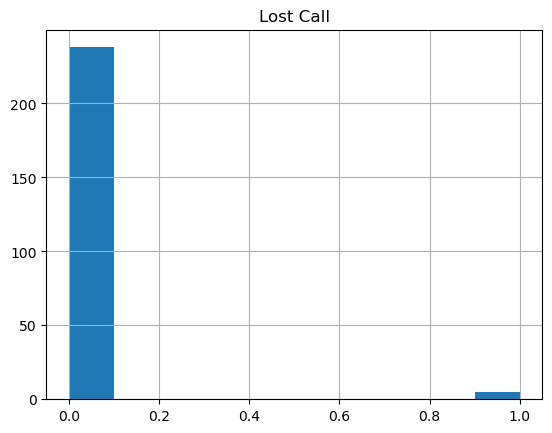

In [47]:
#Checking for unique values in 'Lost Call' using historgram method
north_df.hist(column='Lost Call')

In [48]:
#Checking for unique values in 'Call Purpose' using describe method
north_df['Abandoned'].describe()

count    243.000000
mean       0.028807
std        0.167608
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Abandoned, dtype: float64

array([[<Axes: title={'center': 'Abandoned'}>]], dtype=object)

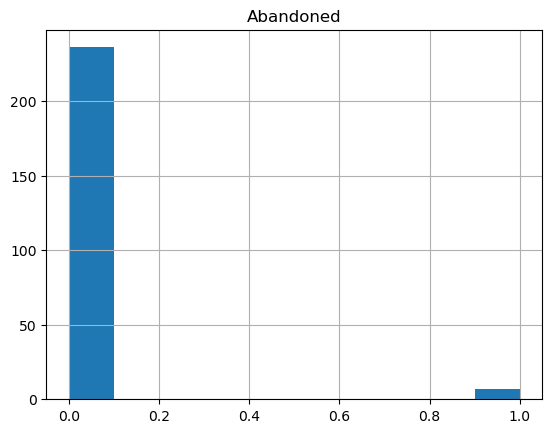

In [49]:
#Checking for unique values in 'Abandoned' using historgram method
north_df.hist(column='Abandoned')

array([[<Axes: title={'center': 'Calls'}>]], dtype=object)

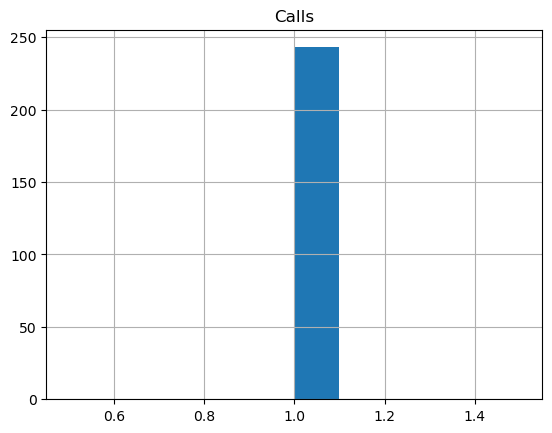

In [50]:
#Checking for unique values in 'Calls' using historgram method - there are no unique values
north_df.hist(column='Calls')

#### SOUTH BRANCH: 

In [51]:
#Checking for unique values in 'Call Purpose' using describe method
south_df['Call Purpose'].describe()

count                 311
unique                  3
top       Product Support
freq                  165
Name: Call Purpose, dtype: object

array([[<Axes: title={'center': 'Lost Call'}>]], dtype=object)

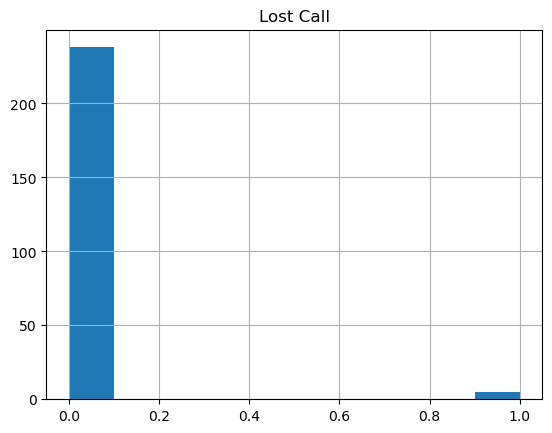

In [52]:
#Checking for unique values in 'Lost Call' using historgram method
north_df.hist(column='Lost Call')

In [53]:
#Checking for unique values in 'Call Purpose' using describe method
north_df['Abandoned'].describe()

count    243.000000
mean       0.028807
std        0.167608
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Abandoned, dtype: float64

array([[<Axes: title={'center': 'Abandoned'}>]], dtype=object)

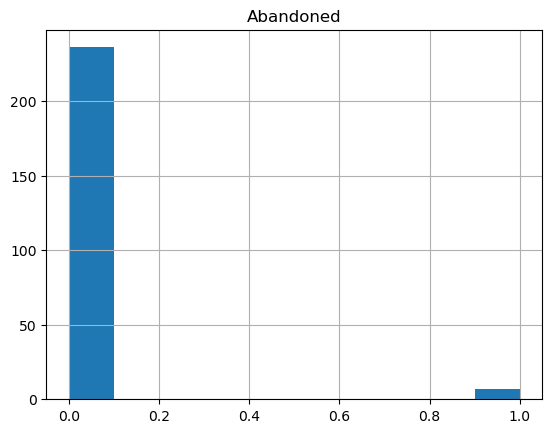

In [54]:
#Checking for unique values in 'Abandoned' using historgram method
north_df.hist(column='Abandoned')

array([[<Axes: title={'center': 'Calls'}>]], dtype=object)

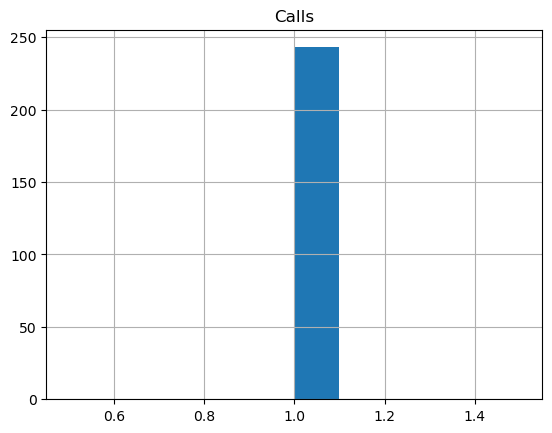

In [55]:
#Checking for unique values in 'Calls' using historgram method - there are no unique values
north_df.hist(column='Calls')

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [56]:
# Created dataframe for the entire company named df
df = pd.concat([north_df, south_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [57]:
df.shape

(554, 15)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent (37 calls)
- South Branch = Eric (35 calls)


In [58]:
# Sort df by Branch and Rep ID then sum calls, sorting in decending order from most to least calls
df_bybranchrep = df.groupby(['Branch','Rep ID']).sum().sort_values(['Branch','Calls'], ascending=False)
df_bybranchrep

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/3282791733.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bybranchrep = df.groupby(['Branch','Rep ID']).sum().sort_values(['Branch','Calls'], ascending=False)


Unnamed: 0  Lost Call  Abandoned  Busy Minutes  \
Branch Rep ID                                                   
South  Eric          5039          0          0           361   
       Randy         4406          3          1           312   
       Helga         5236          0          2           292   
       Sandy         4514          1          0           317   
       George        4620          0          0           298   
       Karl          4532          1          0           287   
       Kate          4557          0          0           283   
       Josh          3960          3          0           260   
       Susan         4006          2          0           267   
       Sharon        4226          1          1           257   
       Alice         3637          0          0           199   
North  Brent         4840          0          1           362   
       Lilly         3375          0          2           307   
       Duke          2999          2          0           292   
       Todd          4252          1          0           296   
       Joe           3128          0          0           246   
       Cam           2746          1          0           233   
       Xander        3340          1          0           244   
       Andy          2494          0          3           228   
       Amanda        2561          0          1           218   

               Not Ready Minutes  Incoming Wait Time  During Call Wait Time  \
Branch Rep ID                                                                 
South  Eric                   54                47.0                    112   
       Randy                  63                47.0                     96   
       Helga                  58                36.0                     95   
       Sandy                  59                34.0                     96   
       George                 53                41.0                     87   
       Karl                   61                26.0                     85   
       Kate                   60                34.0                     80   
       Josh                   50                31.0                     83   
       Susan                  53                35.0                     88   
       Sharon                 38                29.0                     77   
       Alice                  46                15.0                     58   
North  Brent                  71                17.0                    117   
       Lilly                  59                37.0                     88   
       Duke                   56                39.0                     85   
       Todd                   58                21.0                     97   
       Joe                    48                32.0                     78   
       Cam                    46                32.0                     66   
       Xander                 44                20.0                     68   
       Andy                   43                36.0                     65   
       Amanda                 41                12.0                     58   

               Calls  
Branch Rep ID         
South  Eric       35  
       Randy      32  
       Helga      31  
       Sandy      31  
       George     29  
       Karl       28  
       Kate       28  
       Josh       26  
       Susan      26  
       Sharon     25  
       Alice      20  
North  Brent      37  
       Lilly      30  
       Duke       29  
       Todd       29  
       Joe        25  
       Cam        24  
       Xander     24  
       Andy       23  
       Amanda     22

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.29%
- Company Wide = 1.99%
- Do any of these fall out of the optimal range of 2-5%? The South Branch (1.29%) exceeds expectations with a rate lower than 2%.

In [59]:
#Grouped df by Branch and calculated average rate/percent of abandonded calls by branch
df_bybranch = df.groupby(['Branch'])
abandon_avg = {'Abandoned':['mean']}
df_abandon_bybranch = round(df_bybranch.agg(abandon_avg)*100,2)
df_abandon_bybranch

,Abandoned
,mean
Branch,
North,2.88
South,1.29


In [60]:
#Grouped df by Branch and calculated average rate/percent of abandonded calls for whole company
abandon_avg = {'Abandoned':['mean']}
df_abandon__mean = round(df.agg(abandon_avg)*100,2)
df_abandon__mean

,Abandoned
mean,1.99


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.74%, calls= 33
- South Branch = 38.40%, calls= 48
- Company Wide = 39.32%, calls = 81

In [61]:
#Looking at the distribtion of 'Incoming Wait Time' for whole company
df['Incoming Wait Time'].describe()

count    206.000000
mean       3.014563
std        1.370341
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

<Axes: xlabel='Incoming Wait Time', ylabel='Count'>

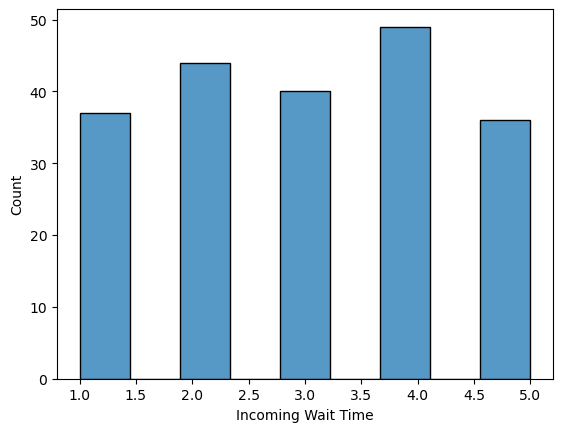

In [62]:
#Looking at the distribtion of 'Incoming Wait Time' for whole company
sns.histplot(data=df['Incoming Wait Time'])

In [63]:
#Dropping missing data by index/row for 'Incoming Wait Time' in order to run analyses.
#This cut my data set by more than half!!!
df_dropped = df.dropna(axis=0)
df_dropped.shape

(206, 15)

In [64]:
#Created new variable for whether incoming wait time was less than or equal to 2 seconds ('Meets Service Level' = 1) or more than 2 seconds ('Meets Service Level' = 0).
def service_level_check(series):
    if series<=2:
        return 1
    else:
        return 0

df_dropped['Meets Service Level'] = df_dropped['Incoming Wait Time'].apply(service_level_check)
df_dropped['Meets Service Level'].value_counts()

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/3367655039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['Meets Service Level'] = df_dropped['Incoming Wait Time'].apply(service_level_check)


0    125
1     81
Name: Meets Service Level, dtype: int64

In [65]:
#Adding up calls that meet service level and calculating company wide percent of calls that meet serive level out of total calls
service_level_sum = df_dropped['Meets Service Level'].sum()

service_level_percent = service_level_sum/len(df_dropped['Meets Service Level'])
service_level_percent = round(service_level_percent*100,2)
service_level_percent

39.32

In [66]:
#Grouping by branch to calculate percent of calls that meet serive level out of total calls by branch
df_bybranch = df_dropped.groupby('Branch')
service_level_sum = df_bybranch['Meets Service Level'].sum()
service_level_sum
print(service_level_sum)

calls_by_branch = df_bybranch['Meets Service Level'].count()
calls_by_branch

service_level_percent = service_level_sum/calls_by_branch
service_level_percent = round(service_level_percent*100,2)
service_level_percent

Branch
North    33
South    48
Name: Meets Service Level, dtype: int64


Branch
North    40.74
South    38.40
Name: Meets Service Level, dtype: float64

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04 sec
- South Branch in seconds = 3.00 sec
- Company Wide in seconds = 3.01 sec

In [67]:
#Calculating the mean of incoming wait time for the whole company
company_avg_answer = df_dropped['Incoming Wait Time'].agg('mean')
round(company_avg_answer,2)

3.01

In [68]:
#Calculating the mean of incoming wait time by branch
df_bybranch = df_dropped.groupby('Branch')
branch_avg_answer = df_bybranch['Incoming Wait Time'].agg('mean')
round(branch_avg_answer,2)

Branch
North    3.04
South    3.00
Name: Incoming Wait Time, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
<Br> I picked a bar graph because it a simple way to compare frequencies across a small number of variables. In this case, it was easy to compare the percentage rates across the 4 different queues. This graph is a good option for comparing distributions with a small group.

In [69]:
# Importing additional libraries needed with alias
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize']=(20,10)
import mplcyberpunk
# style.use('cyberpunk')
from wordcloud import WordCloud, STOPWORDS

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/4025425691.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


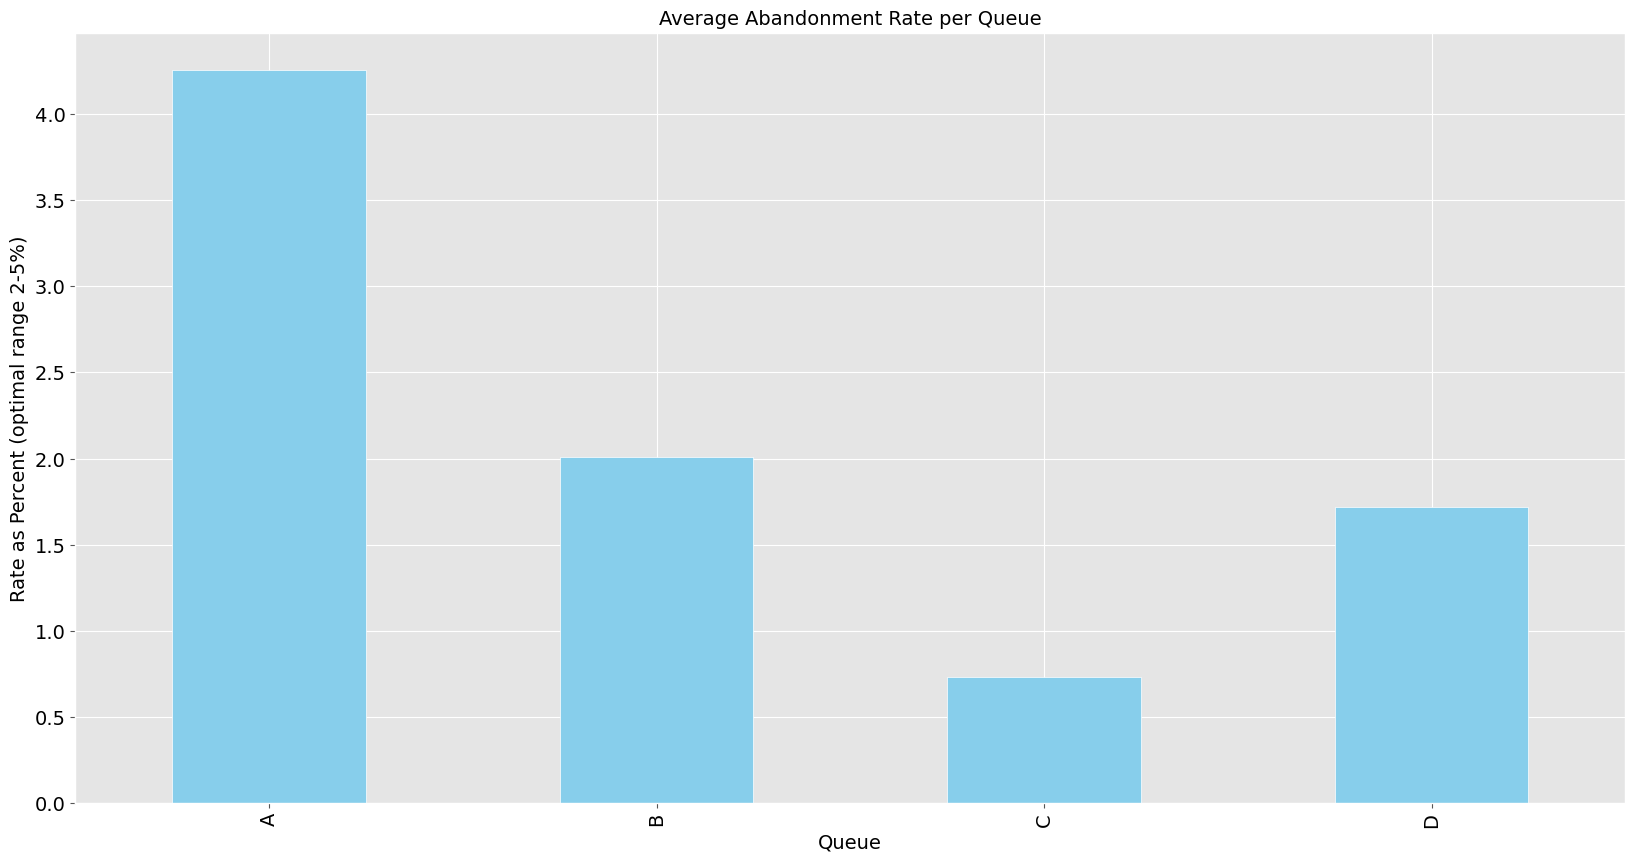

In [70]:
#Dictionary abandonment_rates is the data used.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = round((queue_dict["Abandoned"][i] / queue_dict["Calls"][i])*100,2)

#Visualization 1: Bar Graph of Average Abandonment Rate per Queue
df_abandon=pd.DataFrame.from_dict(abandonment_rates, orient='index')

df_abandon.plot(kind='bar', legend=False, color='skyblue', edgecolor='white')
plt.title('Average Abandonment Rate per Queue', color='black', fontsize=14)
plt.xticks(color='black', fontsize=14)
plt.yticks(color='black', fontsize=14)
plt.xlabel('Queue', color='black', fontsize=14)
plt.ylabel('Rate as Percent (optimal range 2-5%)', color='black', fontsize=14)
plt.savefig('AvgAbandonRateQueue.png')

plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
<Br> I picked a bar graphs again because there were only a few different representatives to compare and I wanted to compare frequency data (i.e., averages and percentages) across a handful of representatives. I also wanted to show the differece between quick answered calls and total calls for each rep for background information, so I used a double bar graph first to be able to visualize each reps difference between quick calls and their total calls. This graph is a good option for comparing distributions with a small group and when you want to make a couple comparision between those individual items (i.e., the reps) in the group. I returned to a simple bar graph after this double bar graph for the same reasons I used a bar graph in the first visualization. I wanted to compare frequency of calls across a small amount of reps. 

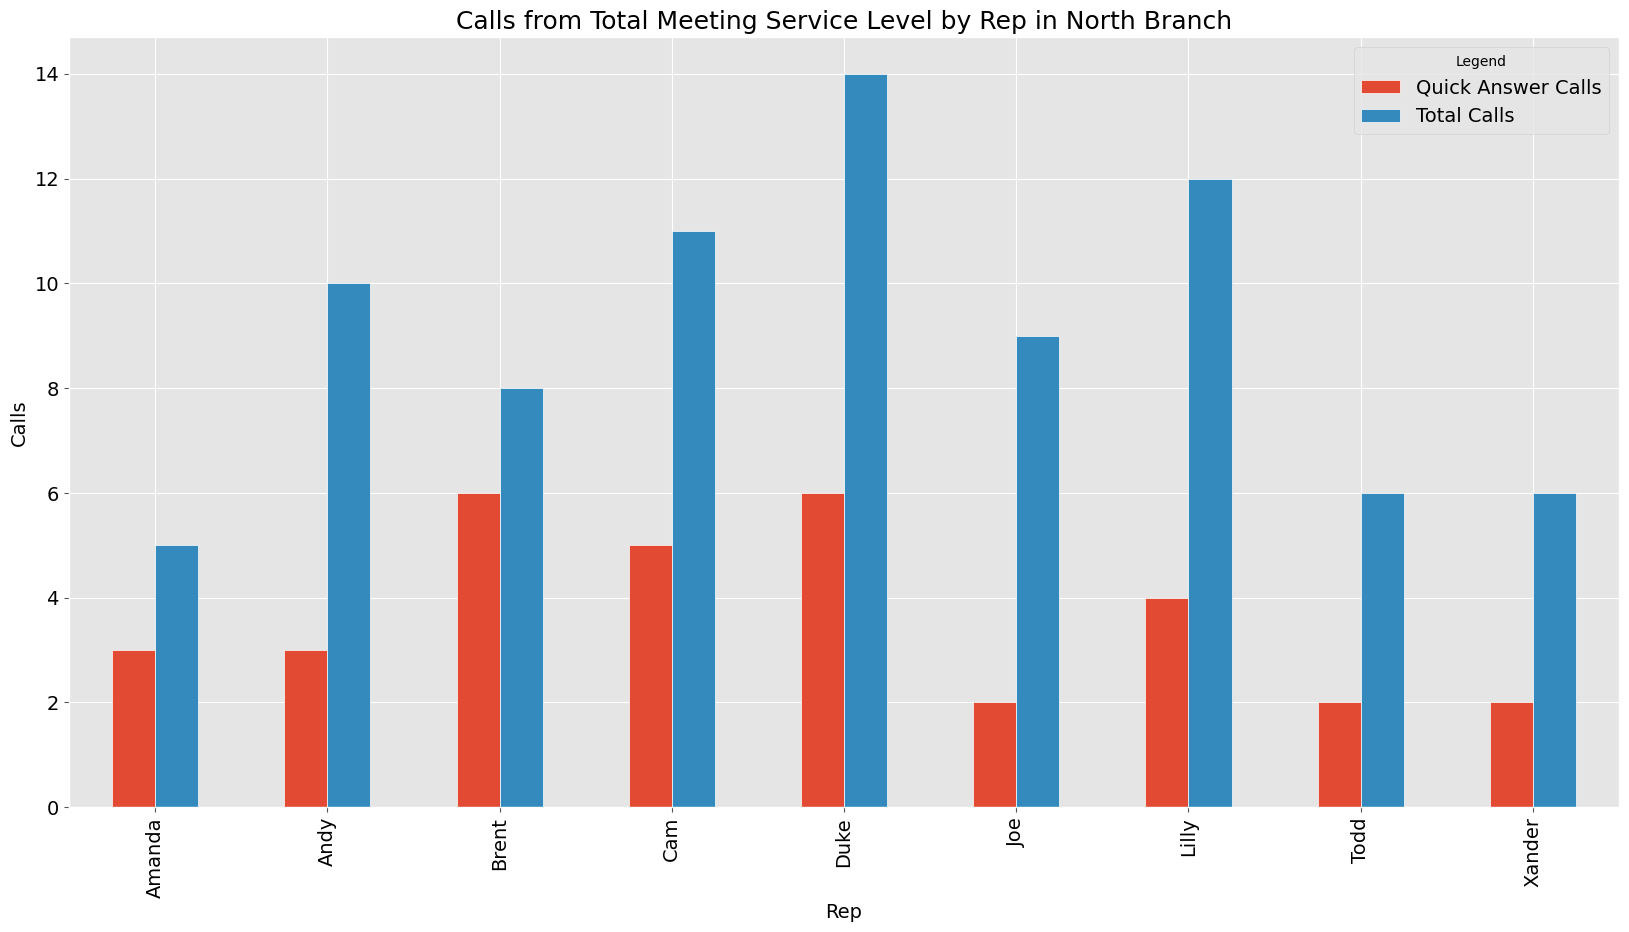

In [71]:
# Useing north_plt as data for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = round(service_level["Calls_x"]/service_level["Calls_y"] * 100,2)
service_level = service_level.rename(columns={"Calls_x": "Quick Answer Calls", "Calls_y": "Total Calls"})

service_level_counts = service_level.drop(["Service Level %"], axis=1)
service_level_percents = service_level.drop(["Quick Answer Calls","Total Calls"], axis=1)

#EXTRA Visualization 2a: Bar Graph of Calls from Total Meeting Service Level by Rep in North Branch
#Wanted to look at calls meeting service level out of total calls by rep first
service_level_counts.plot.bar(edgecolor='white')
plt.title('Calls from Total Meeting Service Level by Rep in North Branch', color='black', fontsize=18)
plt.xticks(color='black', fontsize=14)
plt.yticks(color='black', fontsize=14)
plt.xlabel('Rep', color='black', fontsize=14)
plt.ylabel('Calls', color='black', fontsize=14)
plt.legend(title='Legend', fontsize=14, labelcolor='black')
plt.savefig('north_speed_bar.png')

plt.show()

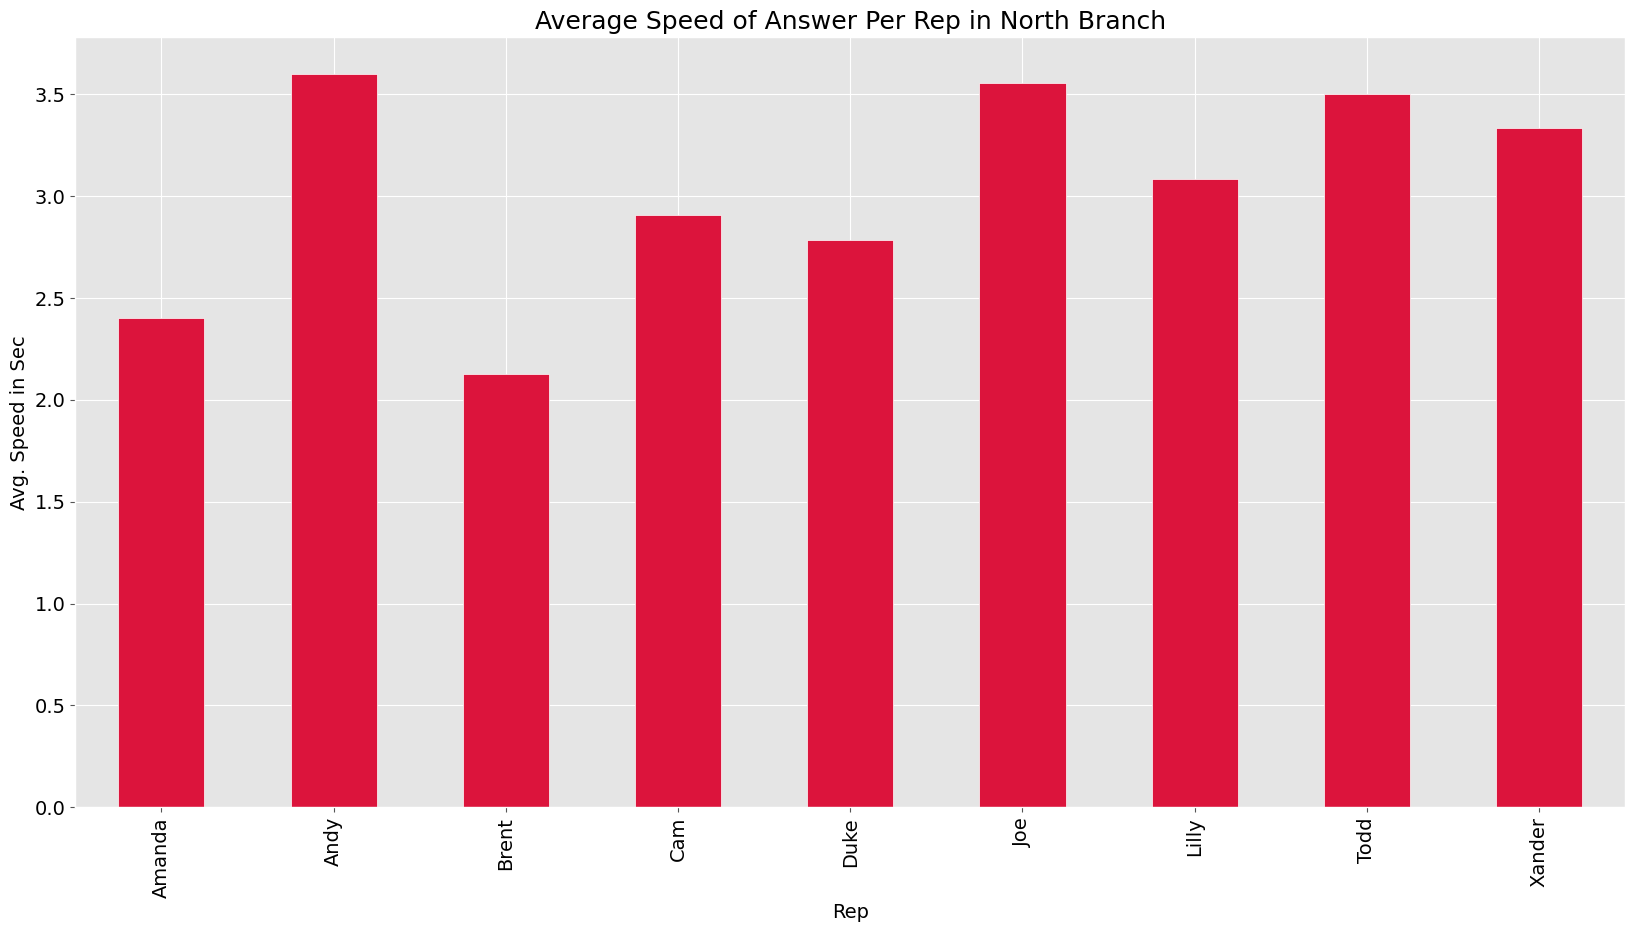

In [72]:
#Visualization 2b: Bar Graph of Average Speed of Answer Per Rep in North Branch
north_plt.plot(x='Rep ID', y='Incoming Wait Time', kind='bar', legend=False, color='crimson', edgecolor='white')
plt.title('Average Speed of Answer Per Rep in North Branch', color='black', fontsize=18)
plt.xticks(color='black', fontsize=14)
plt.yticks(color='black', fontsize=14)
plt.xlabel('Rep', color='black', fontsize=14)
plt.ylabel('Avg. Speed in Sec', color='black', fontsize=14)
plt.savefig('north_speed_bar2.png')

plt.show()

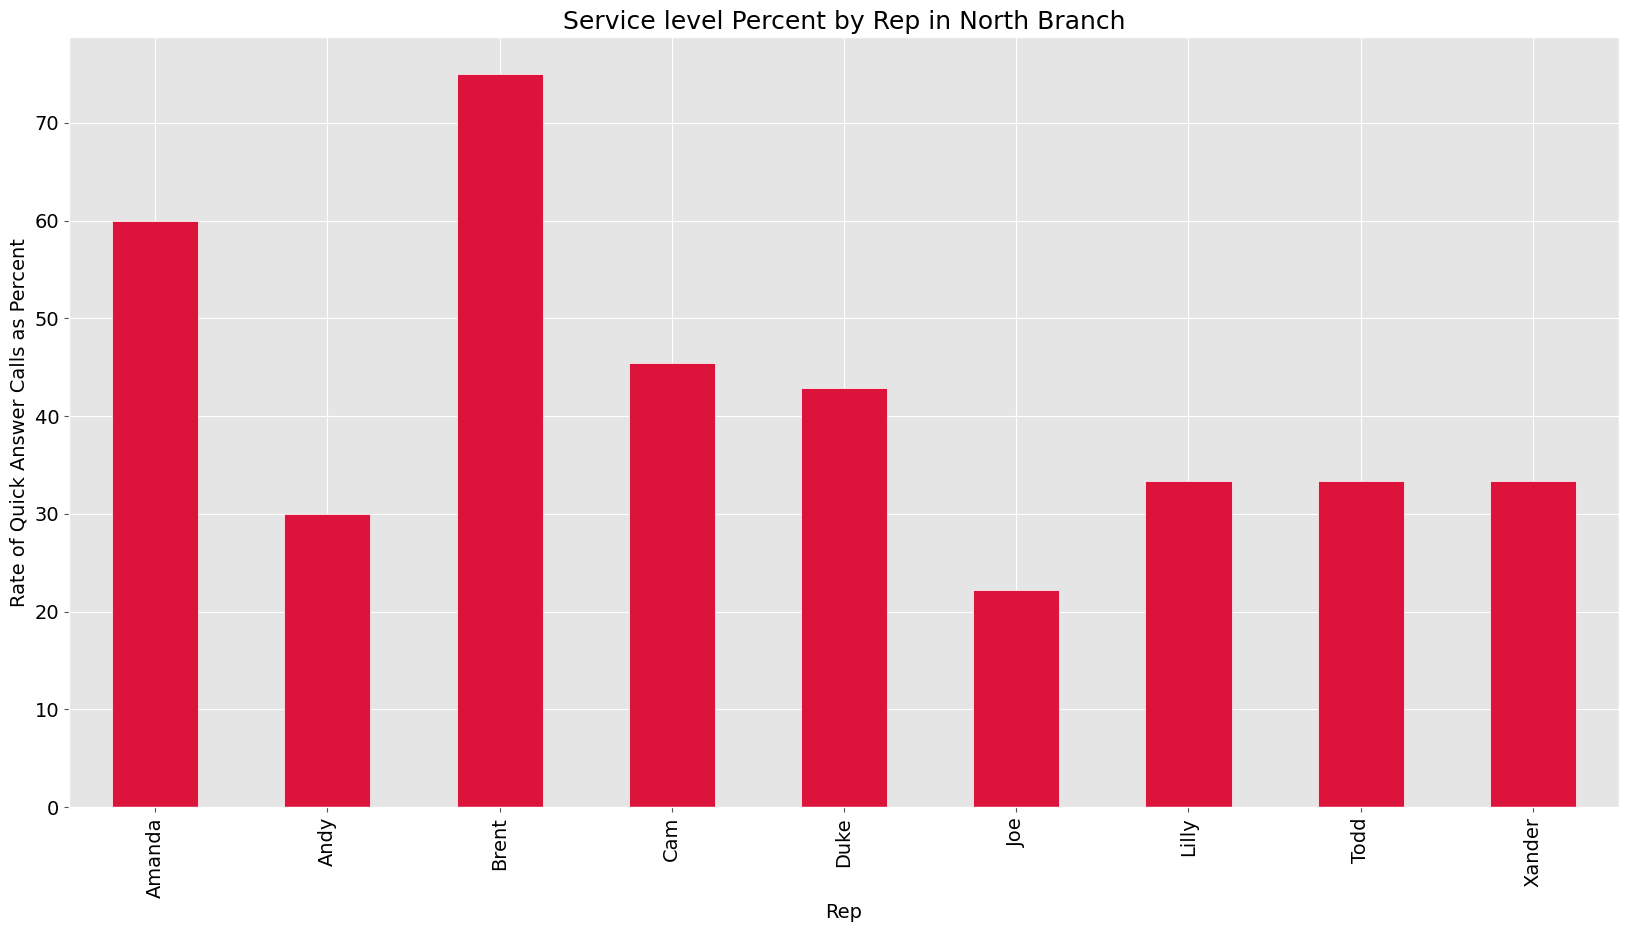

In [73]:
#Visualization 2c: Service level Percent by Rep in North Branch
service_level_percents.plot(kind='bar', legend=False, color='crimson', edgecolor='white')
plt.title('Service level Percent by Rep in North Branch', color='black', fontsize=18)
plt.xticks(color='black', fontsize=14)
plt.yticks(color='black', fontsize=14)
plt.xlabel('Rep', color='black', fontsize=14)
plt.ylabel('Rate of Quick Answer Calls as Percent', color='black', fontsize=14)
plt.savefig('north_speed_bar3.png')

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [74]:
# The three dictionaries, complaints, sales_support, and product_support, were used:

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

print(complaints)
print(sales_support)
print(product_support)

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: Incoming or Outgoing, dtype: int64
{'Incoming': 51}
{'Outgoing': 120, 'Incoming': 73}
{'Outgoing': 228, 'Incoming': 82}


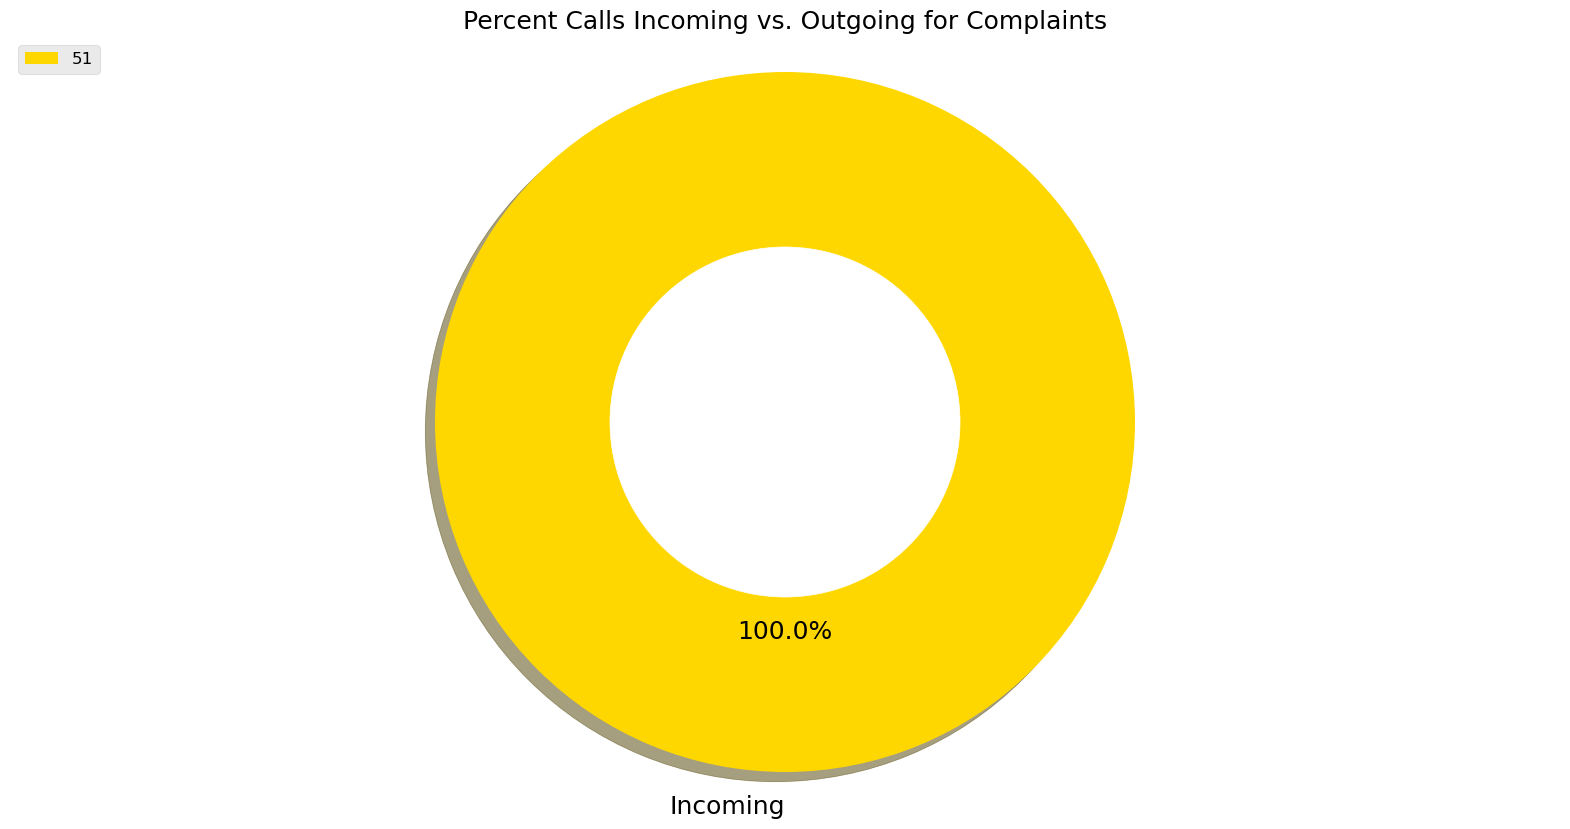

In [75]:
# Visualization 3a: Doughnut of Percent Incoming vs. Outgoing for Complaints
plt.rcParams['font.size'] = 18
circle=plt.Circle((0,0), 0.5, color='white')
colors=['gold', 'lightcoral']
labels = ['Incoming']
labels = list(labels)

plt.pie(complaints.values(), labels=labels, autopct = '%1.1f%%', shadow=True, colors=colors, startangle=90, textprops={'color':'black'})
fig=plt.gcf()
fig.gca().add_artist(circle)

plt.legend(complaints.values(), fontsize = 12, loc = 'upper left', labelcolor='k')
plt.title('Percent Calls Incoming vs. Outgoing for Complaints', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut1.png')

plt.show()

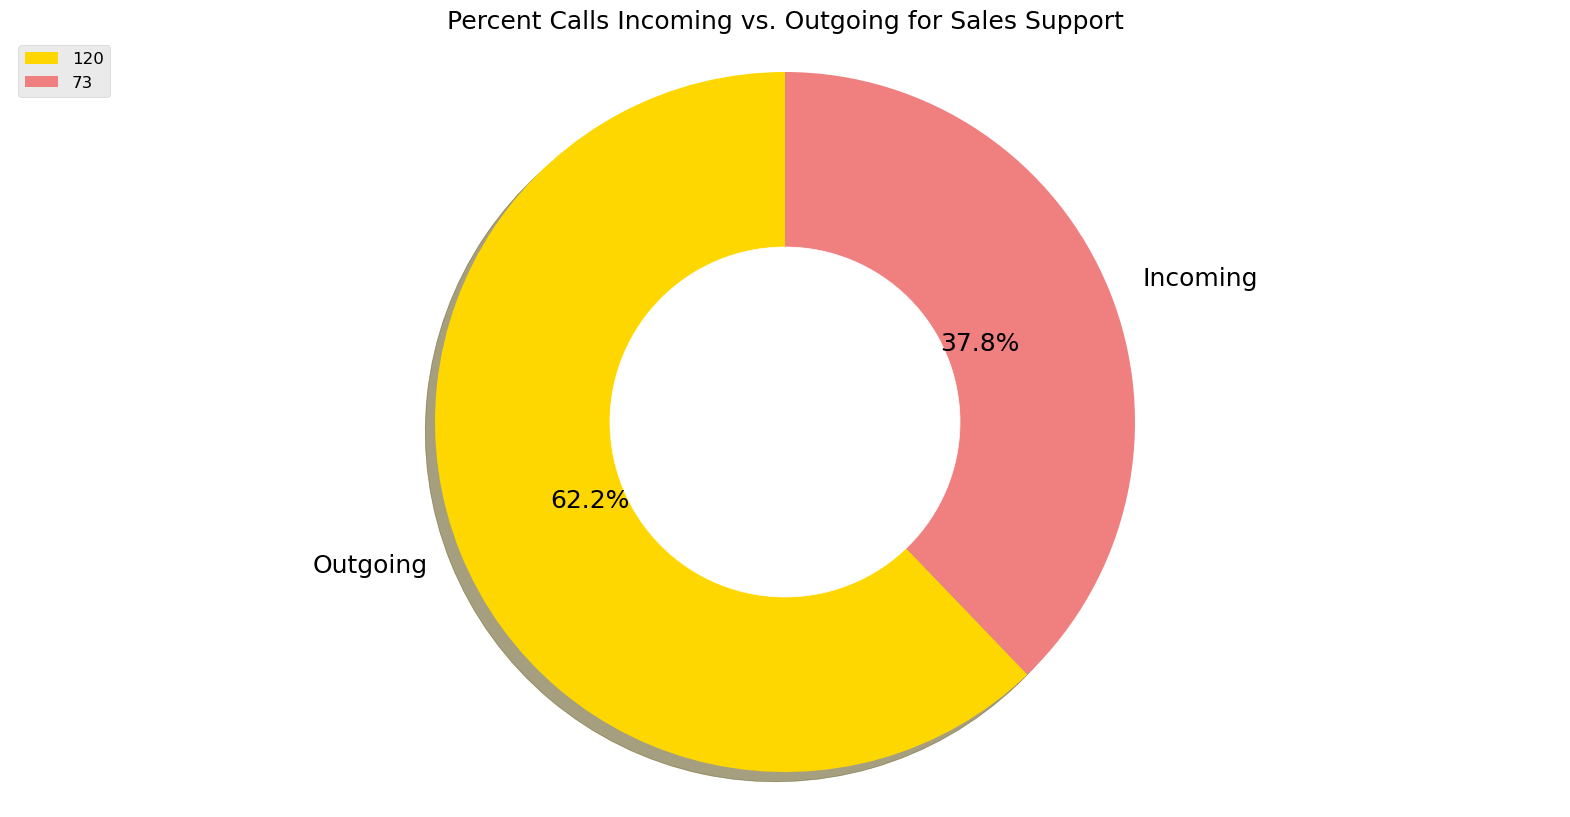

In [76]:
# Visualization 3b: Doughnut of Percent Incoming vs. Outgoing for Sales Support
plt.rcParams['font.size'] = 18
circle=plt.Circle((0,0), 0.5, color='white')
colors=['gold', 'lightcoral']
labels = ['Outgoing', 'Incoming']
labels = list(labels)

plt.pie(sales_support.values(), labels=labels, autopct = '%1.1f%%', shadow=True, colors=colors, startangle=90, textprops={'color':'black'})
fig=plt.gcf()
fig.gca().add_artist(circle)

plt.legend(sales_support.values(), fontsize = 12, loc = 'upper left', labelcolor='k')
plt.title('Percent Calls Incoming vs. Outgoing for Sales Support', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut2.png')

plt.show()

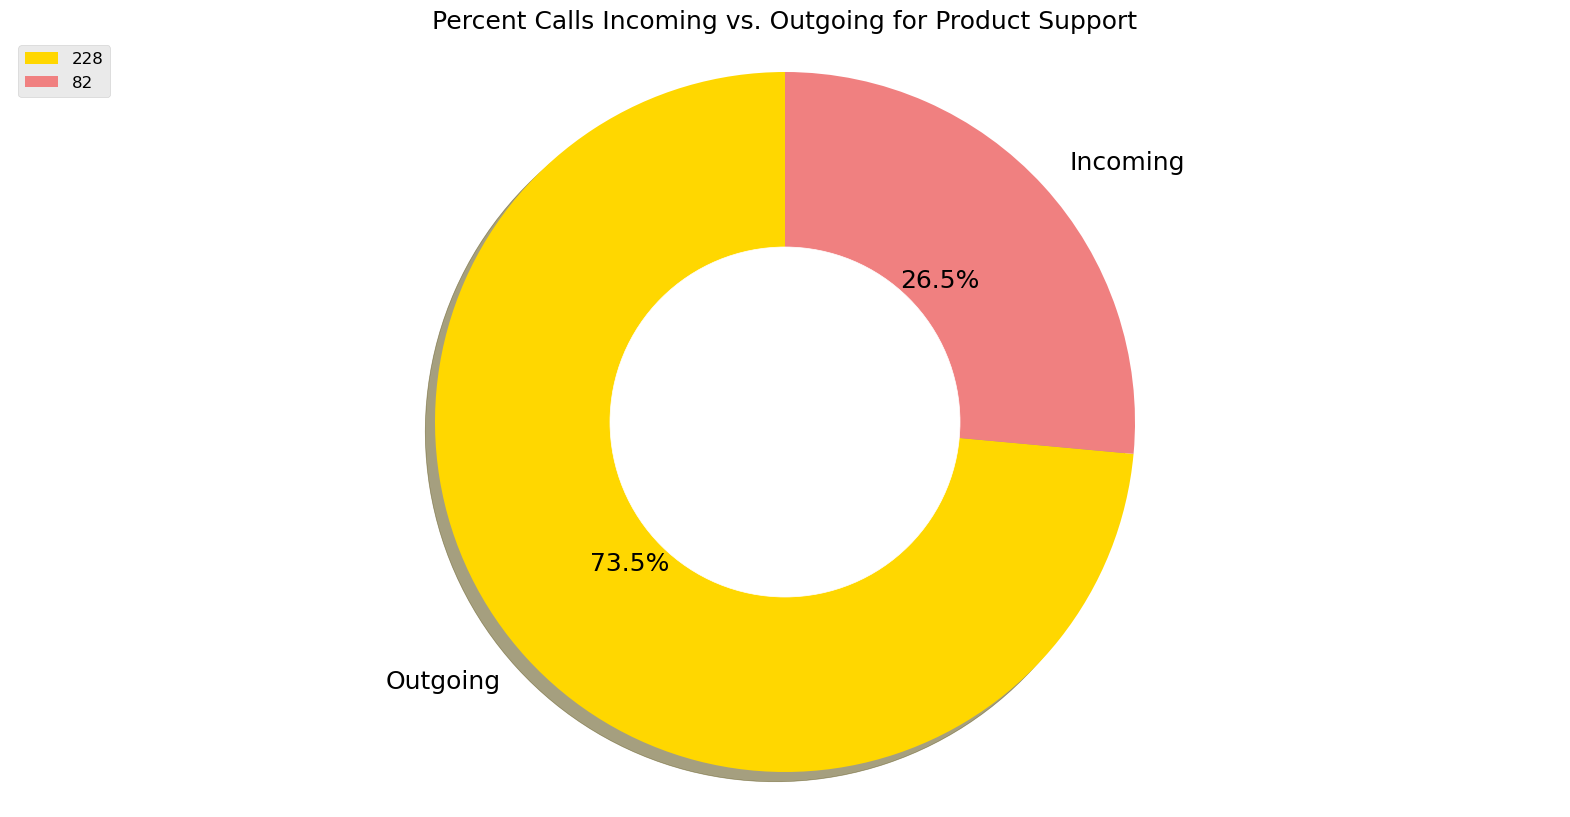

In [77]:
# Visualization 3c: Doughnut of Percent Incoming vs. Outgoing for Product Support
plt.rcParams['font.size'] = 18
circle=plt.Circle((0,0), 0.5, color='white')
colors=['gold', 'lightcoral']
labels = ['Outgoing', 'Incoming']
labels = list(labels)

plt.pie(product_support.values(), labels=labels, autopct = '%1.1f%%', shadow=True, colors=colors, startangle=90, textprops={'color':'black'})
fig=plt.gcf()
fig.gca().add_artist(circle)

plt.legend(product_support.values(), fontsize = 12, loc = 'upper left', labelcolor='k')
plt.title('Percent Calls Incoming vs. Outgoing for Product Support', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut3.png')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
>Your Answer: The South Branch is performing better. The South Branch exceeds expectations with an abandonment rate lower than 2% (1.29%) and the South Branch has a slightly faster average speed to answer calls (3 secs versus 3.04 secs in North Branch).  

>On percentage of calls answered in less than 2 seconds, the North Branch has the higest percentage at 40.74%. The average speed of answer is similar between both branches, but the North Branch takes 0.04 seconds longer at answering, on average. This suggests that some rep(s) in North Branch may be overperofrming on the Service Level KPI, making the average longer but the percent answered quickly higher. Brent and Amanda are high performers in the North Branch when looking at service level percent (i.e., percent of calls answered in less than 2 seconds). But on all other KPIs (abandonment rate and average speed to answer), South Branch is outperforming the North Branch.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The North Branch has only 9 reps and the South Branch has 11. Given that North Branch is underperforming on 2 of the 3 KPIs compared to South Branch, the North Branch would benefit from extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I wish I had the missing data for incoming wait time or confirmation that the missing data represents "no wait time" or zero. I was uncertain about running this whole analysis on a varaible that was missing more than half it's data. I can't really get behind the accurancy of the results, given that incoming wait time was the only varible in which North Branch excelled on. Perhaps the conclusion would be the same for this reason, that North Branch still needs help. I would also want to know why incoming wait time is misssing at such a large amount, given that this is a primary KPI.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a stacked bar graph as this is most helpful when making comparisions (i.e., between call counts) among a variable with a small range (i.e, time block times) and can also visually depict differenes in both another two simple conditions - incoming or outgoing calls. I felt this type of graph best displayed the data simply but was also best presented in 3 different stacked bar graphs for each call purpose.

In [78]:
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times.head()

,Time Block,Call Purpose,Incoming or Outgoing,Calls
0,9:00 AM,Complaint,Incoming,1
1,11:00 AM,Sales Support,Incoming,1
2,11:00 AM,Sales Support,Incoming,1
3,4:00 PM,Sales Support,Incoming,1
4,12:00 PM,Product Support,Incoming,1


/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/1946356608.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = call_times.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])


Text(0.5, 0, 'Time Block')

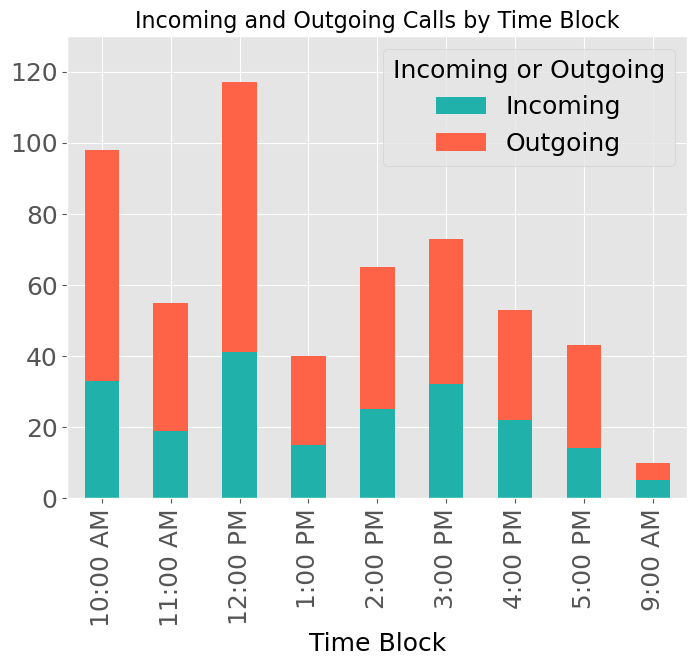

In [79]:
# Used groupby to plot based on time blocks
df_grouped = call_times.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])

#Bonus Mission visualization 1:

pivot = pd.pivot_table(data=df_grouped, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
ax = pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(8,6))
ax.set_title('Incoming and Outgoing Calls by Time Block', fontsize=16)
ax.set_ylim(0,130)
ax.set_xlabel('Time Block')

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/2752181072.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped3 = df_grouped2.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])


Text(0.5, 0, 'Time Block')

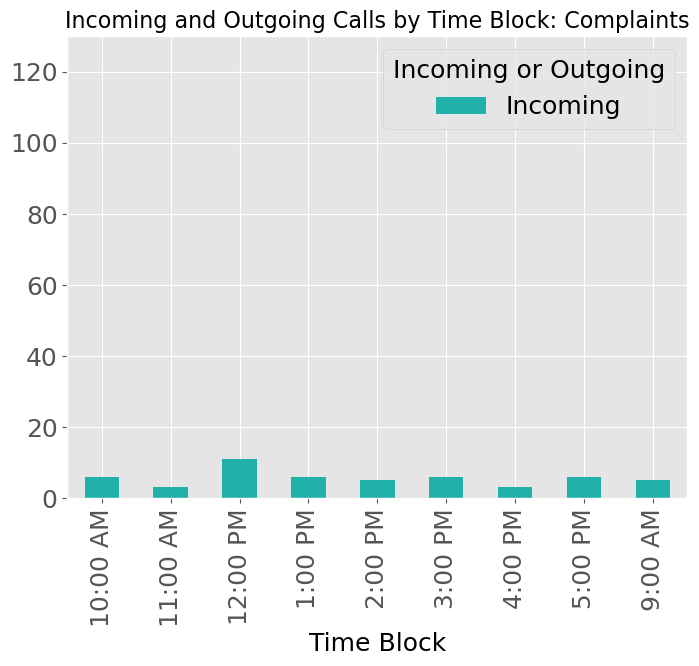

In [80]:
# Used groupby and get_group to select which call purpose to plot:
df_grouped2=call_times.groupby('Call Purpose')
df_grouped2=df_grouped2.get_group('Complaint')

df_grouped3 = df_grouped2.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])

#Bonus Mission visualization 2:

pivot = pd.pivot_table(data=df_grouped3, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
ax = pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(8,6))
ax.set_title('Incoming and Outgoing Calls by Time Block: Complaints', fontsize=16)
ax.set_ylim(0,130)
ax.set_xlabel('Time Block')

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/2422511677.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped5 = df_grouped4.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])


Text(0.5, 0, 'Time Block')

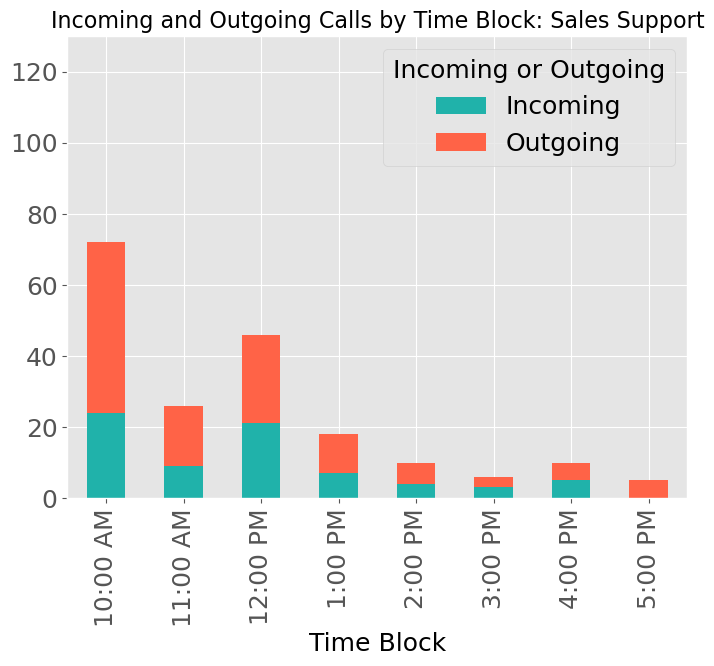

In [81]:
df_grouped4=call_times.groupby('Call Purpose')
df_grouped4=df_grouped4.get_group('Sales Support')

df_grouped5 = df_grouped4.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])

#Bonus Mission visualization 3:

pivot = pd.pivot_table(data=df_grouped5, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
ax = pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(8,6))
ax.set_title('Incoming and Outgoing Calls by Time Block: Sales Support', fontsize=16)
ax.set_ylim(0,130)
ax.set_xlabel('Time Block')

/var/folders/nc/sfbwykc541d4ktbn0q7gz6080000gp/T/ipykernel_84900/2687908157.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped7 = df_grouped6.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])


Text(0.5, 0, 'Time Block')

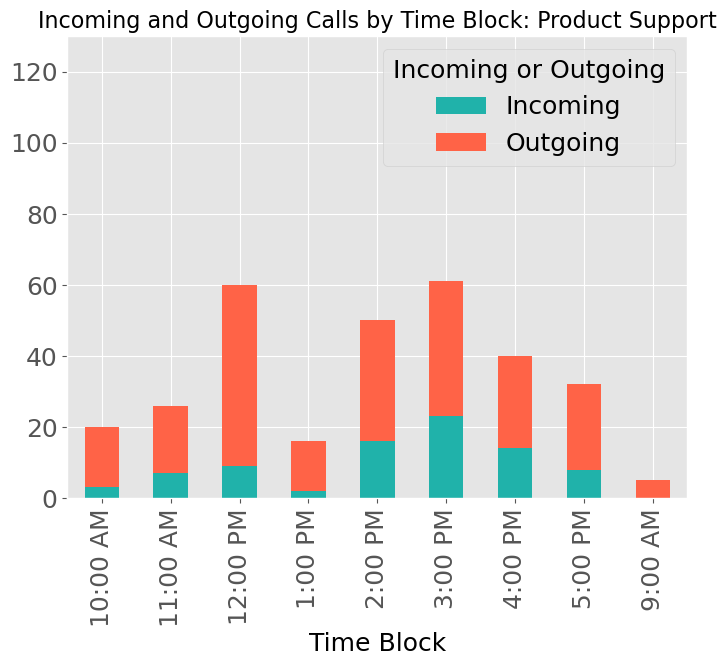

In [82]:
df_grouped6=call_times.groupby('Call Purpose')
df_grouped6=df_grouped6.get_group('Product Support')

df_grouped7 = df_grouped6.groupby(['Time Block', 'Incoming or Outgoing']).sum().sort_values(['Time Block','Incoming or Outgoing'])

pivot = pd.pivot_table(data=df_grouped7, index=['Time Block'], columns=['Incoming or Outgoing'], values='Calls')
ax = pivot.plot.bar(stacked=True, color =['lightseagreen', 'tomato'], figsize=(8,6))
ax.set_title('Incoming and Outgoing Calls by Time Block: Product Support', fontsize=16)
ax.set_ylim(0,130)
ax.set_xlabel('Time Block')